# Distribusi Probabilitas

Distribusi Probabilitas adalah **fungsi** yang menggambarkan **kemungkinan** dari setiap hasil dalam ruang sampel suatu percobaan acak

1. Distribusi Probabilitas **Diskrit**:
    * Distribusi Binomial
    * Distribusi Poisson
2. Distribusi Probabilitas **Kontinu**:
    * Distribusi Normal
    * Distribusi Eksponensial
    * Distribusi T
    * Distribusi Gamma
    * Distribusi Weibull
3. Keduanya, tergantung konteks:
    * Distribusi Uniform

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Create a function to generate Q-Q plots and histogram
def qq_hist_plot(data, dist, dist_name):
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Histogram
    ax1.hist(data, bins=30, density=True, alpha=0.6, color='blue')
    ax1.set_title(f"Histogram of {dist_name} Distribution")
    ax1.set_xlabel("Value")
    ax1.set_ylabel("Density")

    # Q-Q Plot
    stats.probplot(data, dist=dist, plot=ax2)
    ax2.set_title(f"Q-Q Plot for {dist_name} Distribution")
    ax2.set_xlabel("Theoretical Quantiles")
    ax2.set_ylabel("Sample Quantiles")
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 1. Distribusi Binomial

Distribusi Binomial digunakan untuk menghitung probabilitas dari **sejumlah keberhasilan** dalam sejumlah percobaan independen yang memiliki dua hasil (contoh, sukses atau gagal).

**Parameter:**
* 𝑛: jumlah percobaan (trials)
* 𝑝: probabilitas keberhasilan pada setiap percobaan

Contoh: Jika Anda melempar koin 10 kali, Anda bisa menggunakan distribusi binomial untuk menghitung probabilitas mendapatkan 3 kali "kepala".

<img src="binomial.png" alt="drawing" width="500"/>

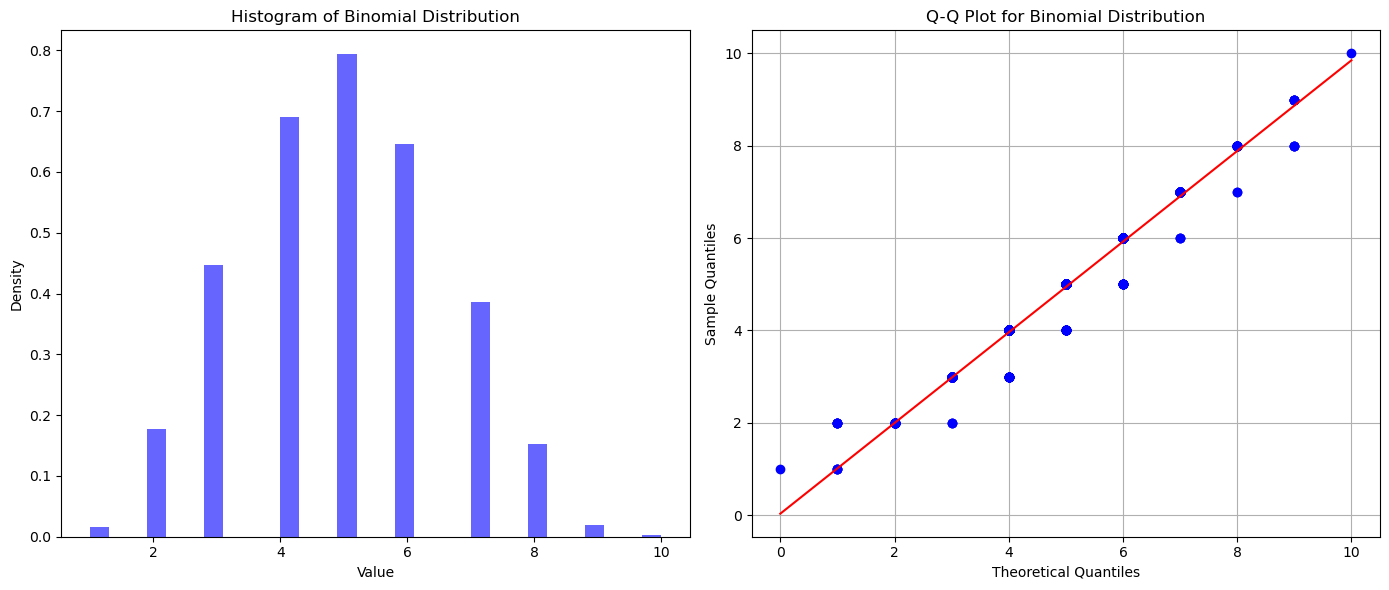

In [4]:
n_binomial = 10  # Number of trials
p_binomial = 0.5  # Probability of success
binomial_data = np.random.binomial(n=n_binomial, p=p_binomial, size=n_samples)

qq_hist_plot(binomial_data, stats.binom(n=n_binomial, p=p_binomial), "Binomial")  # Binomial

## 2. Distribusi Poisson

Distribusi Poisson adalah distribusi probabilitas diskrit yang digunakan untuk menggambarkan jumlah kejadian dalam interval waktu atau ruang tertentu, di mana kejadian tersebut terjadi dengan rata-rata yang diketahui dan independen satu sama lain.

* **Parameter Lambda**: Rata-rata jumlah kejadian dalam interval yang ditentukan. Dalam konteks ini, λ juga dianggap sebagai varians dari distribusi Poisson.
* **Kejadian Acak**: Distribusi ini sering digunakan untuk memodelkan kejadian yang jarang terjadi dalam waktu tertentu, seperti jumlah panggilan yang diterima oleh pusat layanan dalam satu jam, jumlah kecelakaan lalu lintas di suatu jalan selama sehari, atau jumlah partikel radioaktif yang terurai dalam satu detik.

<img src="poisson.png" alt="drawing" width="800"/>

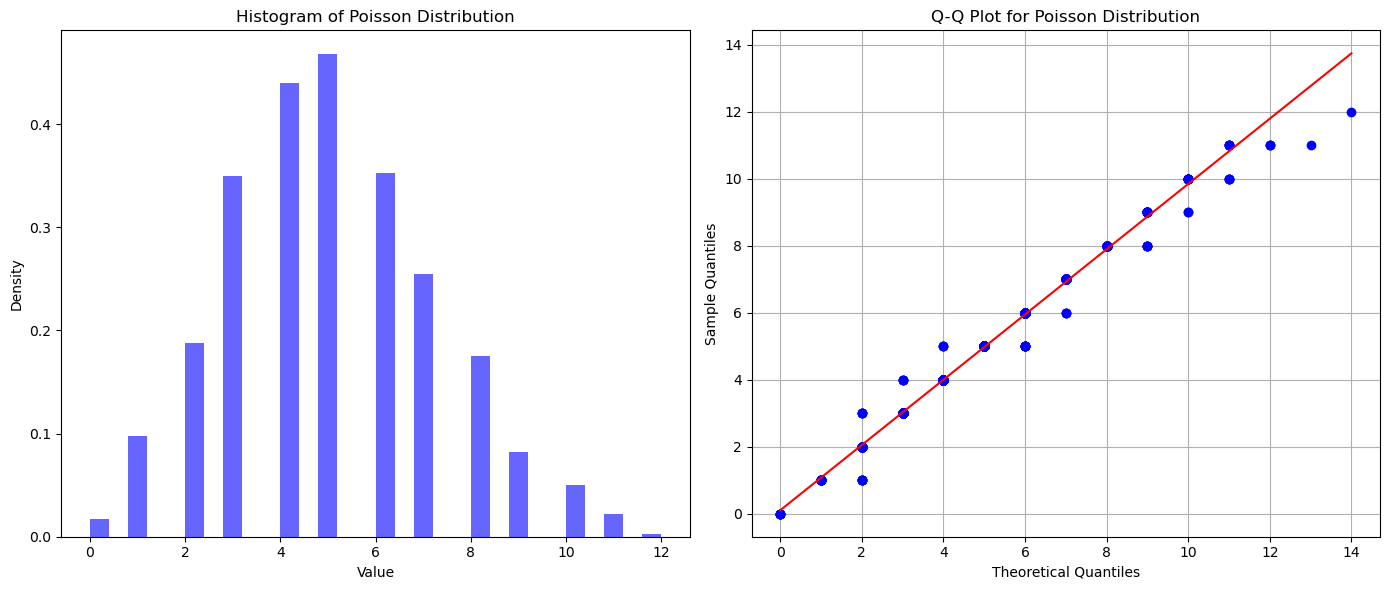

In [6]:
lambda_poisson = 5  # Average number of events
poisson_data = np.random.poisson(lam=lambda_poisson, size=n_samples)
qq_hist_plot(poisson_data, stats.poisson(mu=lambda_poisson), "Poisson")  # Poisson

## 3. Distribusi Normal

Distribusi normal adalah distribusi probabilitas kontinu yang simetris dan berbentuk lonceng, di mana **sebagian besar nilai data berkumpul di sekitar rata-rata (mean)**, dan probabilitas untuk nilai yang lebih jauh dari rata-rata menurun secara eksponensial.

* **Simetri**: Distribusi normal simetris di sekitar mean. Ini berarti bahwa setengah dari nilai berada di atas rata-rata dan setengah lainnya di bawah rata-rata.
* **Mean, Median, dan Modus adalah nilai yang sama** dan terletak di tengah distribusi.
* **Empirical Rule**: Sekitar 68% dari data berada dalam satu deviasi standar dari rata-rata, sekitar 95% berada dalam dua deviasi standar, dan sekitar 99.7% berada dalam tiga deviasi standar. Dikenal sebagai aturan **68-95-99.7**.

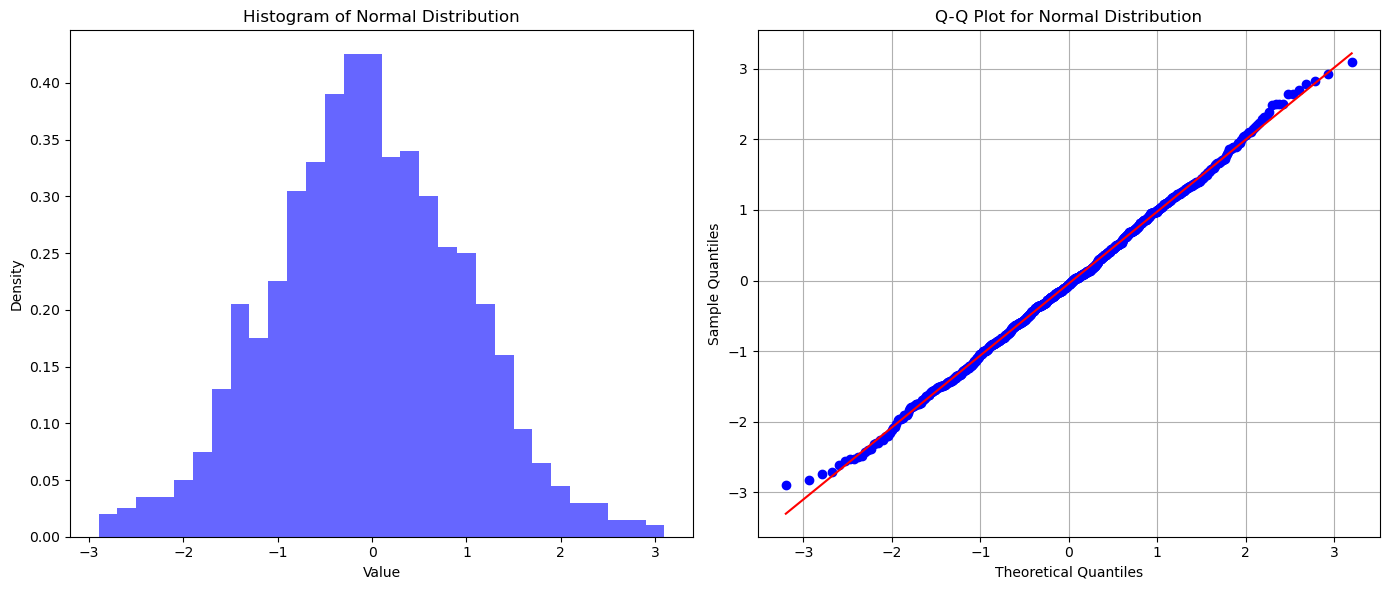

In [8]:
mean_normal = 0  # Mean
std_normal = 1   # Standard deviation
normal_data = np.random.normal(loc=mean_normal, scale=std_normal, size=n_samples)
qq_hist_plot(normal_data, stats.norm(loc=mean_normal, scale=std_normal), "Normal")  # Normal

## 4. Distribusi Eksponensial

Distribusi eksponensial digunakan untuk **memodelkan waktu antara kejadian dalam proses yang mengikuti distribusi Poisson**. Ini adalah distribusi yang tidak memiliki memori, yang berarti bahwa waktu yang sudah berlalu tidak mempengaruhi waktu yang akan datang untuk kejadian berikutnya.

Contoh: Waktu antara kedatangan pelanggan di restoran

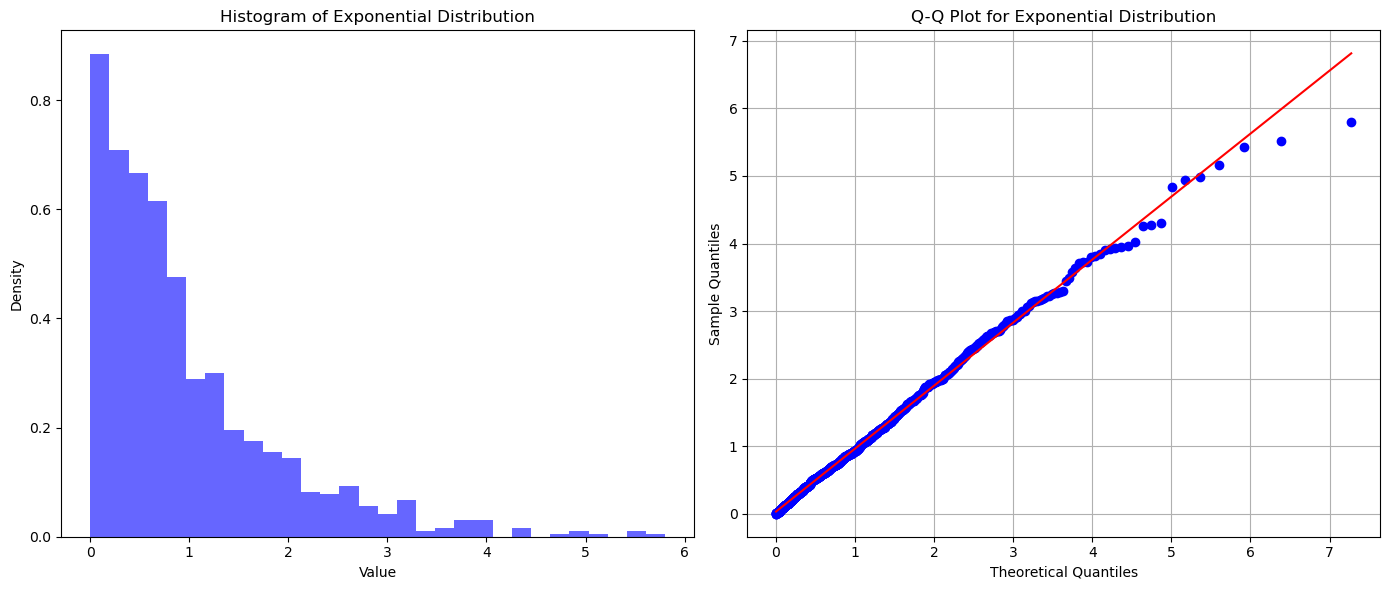

In [10]:
scale_exponential = 1  # Scale parameter
exponential_data = np.random.exponential(scale=scale_exponential, size=n_samples)
qq_hist_plot(exponential_data, stats.expon(scale=scale_exponential), "Exponential")  # Exponential

## 5. Distribusi T

Distribusi T adalah distribusi probabilitas yang mirip dengan distribusi normal tetapi **memiliki "ekor" yang lebih tebal**. Ini berarti bahwa distribusi T lebih mampu menangani data yang memiliki variabilitas yang lebih tinggi, membuatnya lebih robust untuk analisis statistik dengan sampel kecil. 

* **Derajat Kebebasan (Degrees of Freedom)**: Parameter utama distribusi T adalah derajat kebebasan (df), yang biasanya berkaitan dengan ukuran sampel. Semakin besar derajat kebebasan, distribusi T akan semakin mirip dengan distribusi normal.
* **Ekor Lebih Tebal:** Distribusi T memiliki ekor yang lebih tebal dibandingkan distribusi normal. Ini memberikan distribusi T kemampuan untuk menangkap outlier dan variabilitas yang lebih besar dalam data.
* **Digunakan untuk Uji Hipotesis:** Distribusi T sangat berguna dalam uji hipotesis, seperti uji t untuk perbandingan rata-rata dua kelompok. Ini digunakan ketika varians populasi tidak diketahui dan ukuran sampel kecil (biasanya kurang dari 30).

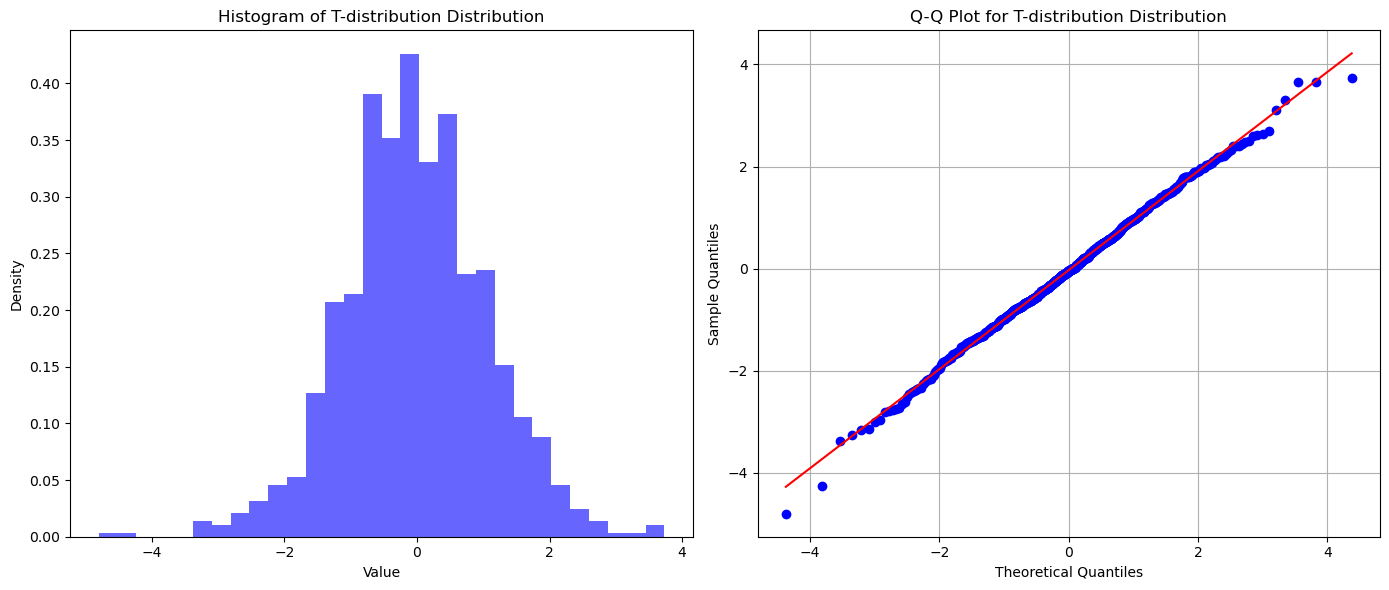

In [34]:
df_t = 10  # Degrees of freedom
t_data = np.random.standard_t(df=df_t, size=n_samples)
qq_hist_plot(t_data, stats.t(df=df_t), "T-distribution")  # T-distribution

## 6. Distribusi Gamma

Distribusi Gamma adalah distribusi kontinu yang ditentukan oleh dua parameter: **shape (bentuk) dan scale (skala)**. Ini adalah distribusi yang sangat fleksibel dan dapat digunakan untuk memodelkan berbagai fenomena yang berbeda, seperti waktu tunggu sampai kejadian tertentu atau jumlah total kejadian dalam periode waktu tertentu.

* **Shape (α):** Menentukan bentuk distribusi. Ketika α < 1, distribusi memiliki bentuk yang menurun; ketika α = 1, distribusi menjadi distribusi eksponensial; dan ketika α > 1, distribusi menjadi lebih simetris dan berbentuk lonceng.
* **Scale (β):** Mengontrol lebar distribusi. Semakin besar nilai β, semakin lebar distribusi Gamma.
* **Menghasilkan Bilangan Positif:** Hanya mendukung nilai positif, menjadikannya cocok untuk memodelkan variabel seperti waktu atau jumlah kejadian.

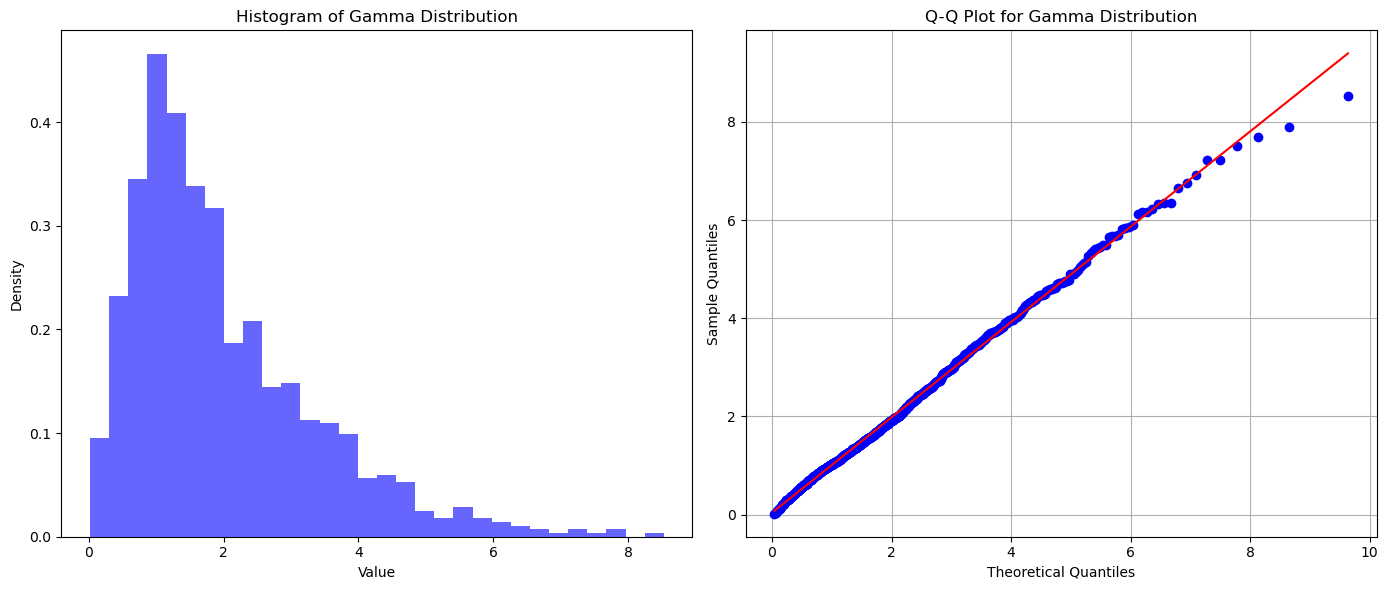

In [14]:
shape_gamma = 2  # Shape parameter
scale_gamma = 1  # Scale parameter
gamma_data = np.random.gamma(shape=shape_gamma, scale=scale_gamma, size=n_samples)
qq_hist_plot(gamma_data, stats.gamma(a=shape_gamma, scale=scale_gamma), "Gamma")  # Gamma

## 7. Distribusi Weibull

Distribusi Weibull adalah distribusi kontinu yang ditentukan oleh satu parameter, yaitu parameter **shape (bentuk)**. Parameter ini mempengaruhi bentuk kurva distribusi dan memberikan fleksibilitas dalam menyesuaikan model dengan karakteristik data.

* **Shape (c):** Parameter ini menentukan bentuk distribusi.
    Jika c < 1, distribusi menunjukkan bahwa risiko kegagalan berkurang seiring berjalannya waktu (misalnya, produk yang "break-in").
    Jika c = 1, distribusi menjadi distribusi eksponensial, yang berarti bahwa risiko kegagalan adalah konstan seiring waktu.
    Jika c > 1, distribusi menunjukkan bahwa risiko kegagalan meningkat seiring berjalannya waktu (misalnya, usia produk).
* **Dapat Menghasilkan Nilai Positif:** Hanya menghasilkan nilai positif, sehingga cocok untuk memodelkan variabel seperti waktu hingga kegagalan atau umur produk.

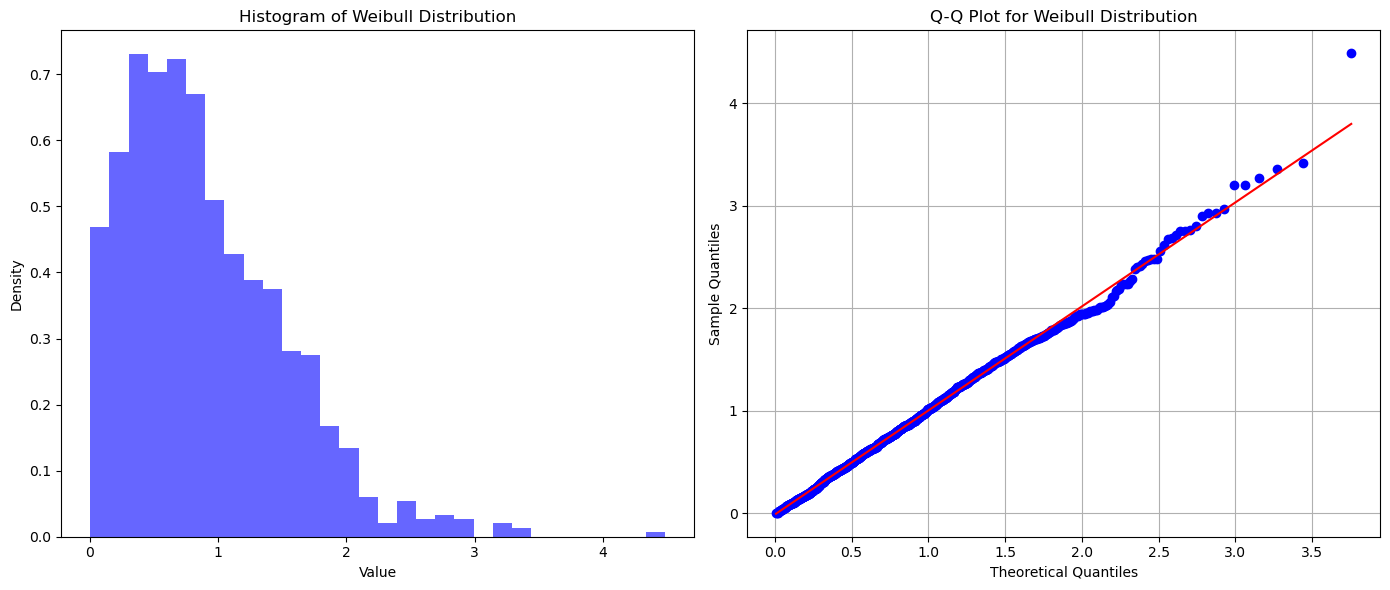

In [16]:
shape_weibull = 1.5  # Shape parameter
weibull_data = np.random.weibull(a=shape_weibull, size=n_samples)
qq_hist_plot(weibull_data, stats.weibull_min(c=shape_weibull), "Weibull")  # Weibull

## 8. Distribusi Uniform

Distribusi uniform adalah jenis distribusi probabilitas di mana **setiap hasil dalam rentang tertentu memiliki peluang yang sama untuk terjadi**. Dengan kata lain, tidak ada nilai yang lebih mungkin muncul dibandingkan nilai lainnya dalam interval yang ditentukan.

* **Interval**: Distribusi uniform biasanya didefinisikan oleh dua parameter: low dan high, yang menentukan batas bawah dan batas atas dari rentang nilai
* **Probabilitas Konstanta**: Dalam interval [low, high], probabilitas untuk setiap nilai di dalam rentang tersebut adalah sama

Contoh: Jika kita menggunakan distribusi uniform untuk menggambarkan hasil dari pelemparan dadu, setiap angka dari 1 sampai 6 memiliki probabilitas yang sama untuk muncul, yaitu 1/6

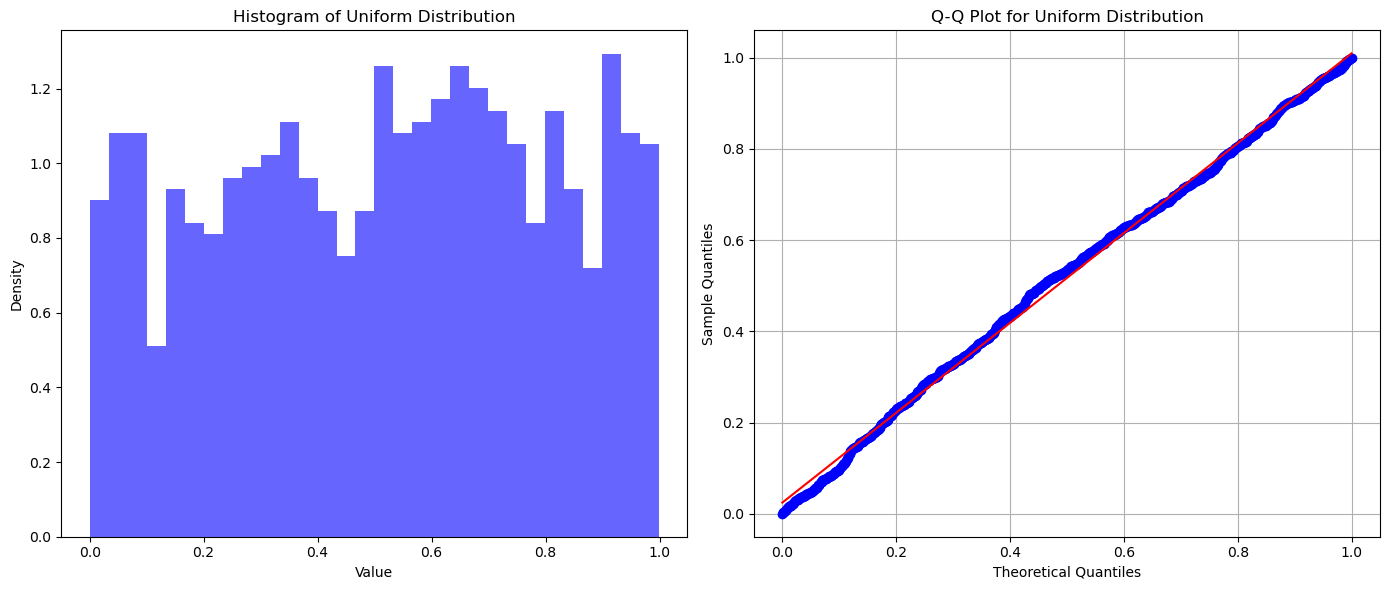

In [18]:
uniform_data = np.random.uniform(low=0, high=1, size=n_samples)
qq_hist_plot(uniform_data, stats.uniform, "Uniform")  # Uniform